<a href="https://colab.research.google.com/github/airctic/icevision/blob/master/notebooks/voc_predefined_splits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to parse a voc dataset using predefined splits

## Installing IceVision and IceData
If on Colab run the following cell, else check the [installation instructions](https://airctic.com/dev/install/)

Install from pypi...

In [1]:
# # Torch - Torchvision - IceVision - IceData - MMDetection - YOLOv5 - EfficientDet Installation
# !wget https://raw.githubusercontent.com/airctic/icevision/master/icevision_install.sh

# # Choose your installation target: cuda11 or cuda10 or cpu
# !bash icevision_install.sh cuda11

... or from icevision master

In [ ]:
# Torch - Torchvision - IceVision - IceData - MMDetection - YOLOv5 - EfficientDet Installation
!wget https://raw.githubusercontent.com/airctic/icevision/master/icevision_install.sh

# Choose your installation target: cuda11 or cuda10 or cpu
!bash icevision_install.sh cuda11 master

In [ ]:
# Restart kernel after installation
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

## Imports

In [2]:
from icevision.all import * 

## Load Pascal VOC 2012 dataset

In [3]:
path = icedata.voc.load_data()

## Set images, annotations and imagesets directories

In [4]:
annotations_dir = path / "Annotations"
images_dir = path / "JPEGImages"
imagesets_dir = path / "ImageSets/Main"

## Define class_map

In [5]:
class_map = icedata.voc.class_map()

## Split data using imagesets

ImageSets directory contains text files containing subsets of the dataset. We will split our dataset using the train and validation sets for aeroplanes.

ImageSets directory contains multiple text files containing subsets of images from JPEGImages. We can use these files to select subsets of our data ie aeroplanes. The values we need to pass to FixedSplitter are the values returned by `record_id` in our parser rather than the filenames.

In [6]:
train = [(line.split(" ",1)[0]) for line in open(imagesets_dir / "aeroplane_train.txt")]
val = [(line.split(" ",1)[0]) for line in open(imagesets_dir / "aeroplane_val.txt")]

In [7]:
presplits = [train, val]
data_splitter = FixedSplitter(presplits)

## Parser: use icevision predefined VOC parser

In [8]:
parser = parsers.VOCBBoxParser(annotations_dir=annotations_dir, images_dir=images_dir, class_map=class_map)

## Train and validation records

In [9]:
train_records, valid_records = parser.parse(data_splitter, autofix=False)

  0%|          | 0/17125 [00:00<?, ?it/s]

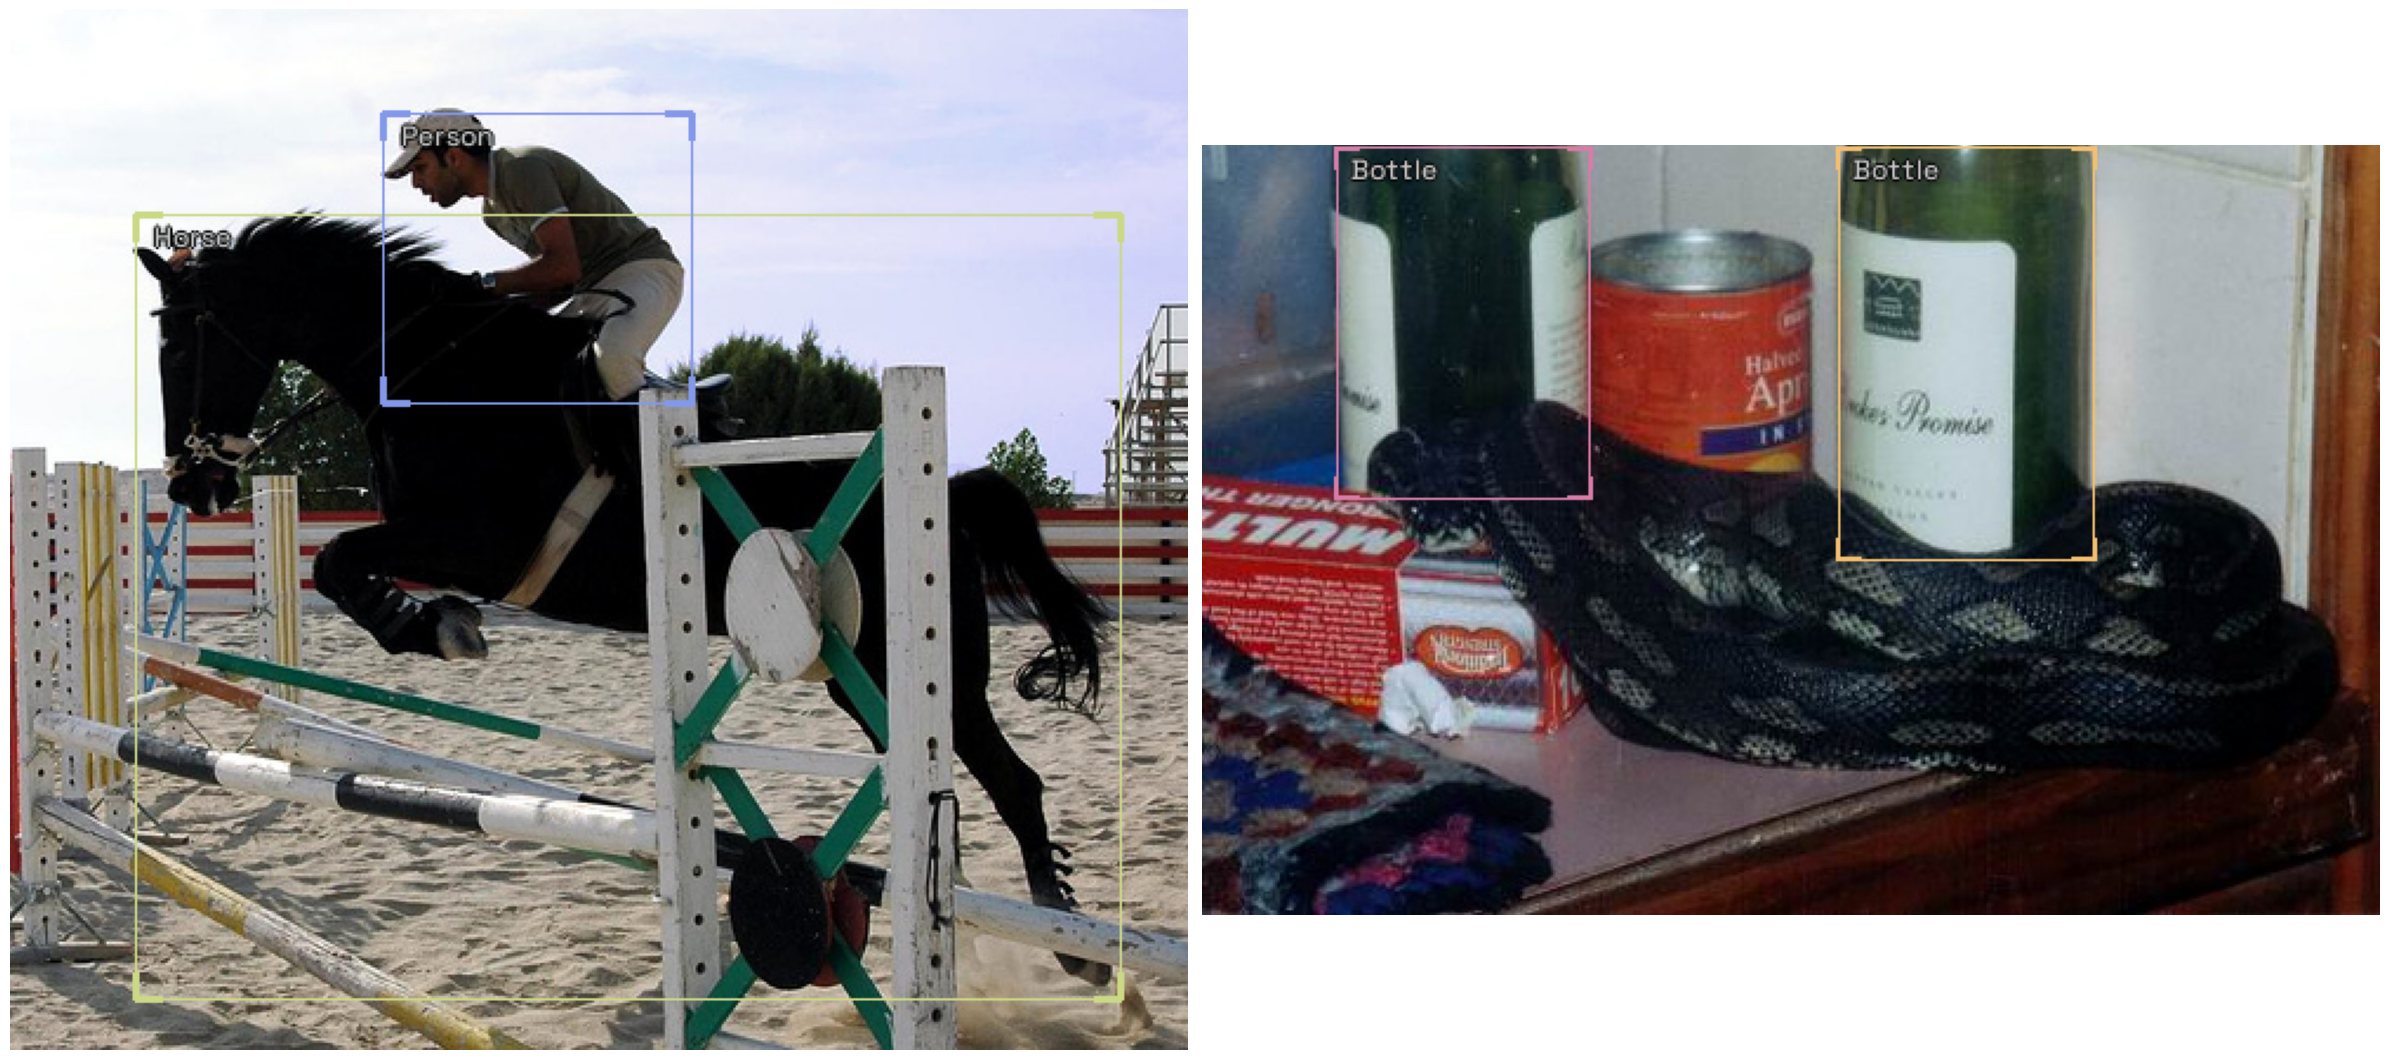

In [10]:
show_records(train_records[:2], ncols=2)